In [1]:
import torch
import torchtext

# The first time you run this will download a ~823MB file
glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                              dim=100)    # embedding size = 50

https://stackoverflow.com/questions/45113130/how-to-add-new-embeddings-for-unknown-words-in-tensorflow-training-pre-set-fo

In [2]:
import torchtext
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torchtext.vocab import Vectors
from tqdm.notebook import tqdm

In [3]:
len(glove)

400000

In [4]:
glove[6]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [5]:
# x = glove['cat']
# y = glove['dog']
# torch.norm(y - x)

In [6]:
x = torch.tensor([1., 1., 1.]).unsqueeze(0)
y = torch.tensor([2., 2., 2.]).unsqueeze(0)
torch.cosine_similarity(x, y) # should be one

tensor([1.])

In [51]:
x = glove['england']
y = glove['beer']
torch.cosine_similarity(glove['england'].unsqueeze(0),
                        glove['beer'].unsqueeze(0))

tensor([0.2118])

In [29]:
x = glove['England']
y = glove['wines ']
torch.cosine_similarity(glove['England'].unsqueeze(0),
                        glove['wines'].unsqueeze(0))

tensor([0.])

# A4_ 1 Word Similarity
Now that we have a notion of distance in our embedding space, we can talk about words that are "close" to each other in the embedding space. For now, let's use Euclidean distances to look at how close various words are to the word "ca

In [234]:
word = 'dog'
other = ['cat', 'puppy', 'kitten', 'mouse', 'kite', 'lion', 'doggy']
for w in other:
    dist = torch.norm(glove[word] - glove[w]) # euclidean distance
    print(w, float(dist))

cat 2.6811304092407227
puppy 3.9500551223754883
kitten 5.06204080581665
mouse 5.034541130065918
kite 6.637244701385498
lion 5.573644638061523
doggy 6.244095802307129


In fact, we can look through our entire vocabulary for words that are closest to a point in the embedding space -- for example, we can look for words that are closest to another word like "cat". (You did this in project 2!)

Keep in mind that GloVe vectors are trained on word co-occurrences, and so words with similar embeddings will tend to co-occur with other words. For example, "cat" and "dog" tend to occur with similar other words---even more so than "cat" and "kitten" because these two words tend to occur in different contexts!

In [37]:
def print_closest_words(vec, n=5):
    dists = torch.norm(glove.vectors - vec, dim=1)     # compute distances to all words
    lst = sorted(enumerate(dists.numpy()), key=lambda x: x[1]) # sort by distance
    for idx, difference in lst[1:n+1]: 					       # take the top n
        print(glove.itos[idx], difference)

print_closest_words(glove["dog"], n=5)

cat 2.6811304
dogs 3.2425272
puppy 3.9500551
pet 3.9634414
horse 4.3288527


In [38]:
print_closest_words(glove['whale'], n=5)

shark 3.657539
dolphin 3.7841108
whales 4.000368
humpback 4.200512
hunts 4.511149


In [39]:
print_closest_words(glove['before'], n=5)

after 2.2805324
when 2.6176212
again 2.9376447
then 2.9955394
time 3.0521593


In [40]:
print_closest_words(glove['however'], n=5)

although 1.2712862
though 1.8014803
but 2.6178648
. 2.6181011
nevertheless 2.6530395


In [176]:
print_closest_words(glove['fabricate'], n=5)

invent 3.2982993
embellish 3.4175081
synthesise 3.6254725
falsify 3.636186
mass-produce 3.6533558


# A4_2  Analogies
One surprising aspect of GloVe vectors is that the directions in the embedding space can be meaningful. The structure of the GloVe vectors certain analogy-like relationship like this tend to hold:

king−man+woman≈queen

In [42]:
print_closest_words(glove['puppy'] - glove['dog'] + glove['cat'])

kitten 3.8146477
cat 3.9500551
puppies 4.0255
kittens 4.157487
pterodactyl 4.1881576


In [41]:
print_closest_words(glove['speak'] - glove['speaker'] + glove['sing'])

speak 7.5174046
sang 7.5502667
cry 7.610008
laugh 7.689598
sings 7.704893


In [40]:
print_closest_words(glove['french'] - glove['france'] + glove['england'])

scottish 4.189797
english 4.2134395
welsh 4.718583
irish 4.8836055
british 4.9753633


In [39]:
print_closest_words(glove['wine'] - glove['France'] + glove['England'])

wines 3.5871894
tasting 4.2200603
beer 4.5414815
grape 4.6474686
champagne 4.6741643


# A4_3
Select a text classification dataset

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

In [51]:
# Import Module 
import os 

# Folder Path 
path = r'/Users/nehakardam/Documents/UWclasses /CSE NLP/A1/A1_data/review_polarity/txt_sentoken/pos'

# Change the directory 
os.chdir(path) 

# Read text File 
def read_text_file(file_path): 
    with open(file_path, 'r') as f: 
        return f.read().splitlines()  

# iterate through all file 
collection_of_data_pos = []
for file in os.listdir(): 
    # Check whether file is in text format or not 
    if file.endswith(".txt"): 
        file_path = f"{path}/{file}"
        # call read text file function 
        collection_of_data_pos = collection_of_data_pos + read_text_file(file_path)

In [52]:
df_pos = pd.DataFrame(collection_of_data_pos, columns = ['Reviews'])
df_pos['Sentiments'] = 'Positive'

In [53]:
# Folder Path 
path = r'/Users/nehakardam/Documents/UWclasses /CSE NLP/A1/A1_data/review_polarity/txt_sentoken/neg'

# Change the directory 
os.chdir(path)   

# iterate through all file 
collection_of_data_neg = []
for file in os.listdir(): 
    # Check whether file is in text format or not 
    if file.endswith(".txt"): 
        file_path = f"{path}/{file}"
        # call read text file function 
        collection_of_data_neg = collection_of_data_neg + read_text_file(file_path)

In [54]:
df_neg = pd.DataFrame(collection_of_data_neg, columns = ['Reviews'])
df_neg['Sentiments'] = 'Negative'

In [146]:
#both the dataframe of positive and negative reviews are concatinated to one dataframe named 'collection_of_data'
df_pos_neg = [df_pos, df_neg]
Collection_of_data = pd.concat(df_pos_neg)
#Shuffle the columns of the data
All_data= Collection_of_data.sample(frac=1).reset_index(drop=True)
All_data

,Reviews,Sentiments
0,his explanation ?,Positive
1,this obviously wasn't a big concern of the fil...,Negative
2,"the twilight murders , another one from the se...",Negative
3,the matchmaker falls for every cliche of thing...,Negative
4,fortunately for chris kattan's precariously po...,Negative
...,...,...
64715,"of course , crafting a tightly claustrophobic ...",Negative
64716,it has no reason to it ; it's just bad directi...,Negative
64717,"from that , they went on and created the most ...",Positive
64718,"a fine cast aside , "" pushing tin "" is nothing...",Negative


In [59]:
All_data.to_csv('/Users/nehakardam/Documents/UWclasses /CSE NLP/A1/A1_data/review_polarity/txt_sentoken/All_data_jan2022.csv', index = False)
lex_neg = pd.read_csv('/Users/nehakardam/Documents/UWclasses /CSE NLP/A1/A1_data/opinion_lexicon_English/neg-words.txt', header = None)
lex_pos = pd.read_csv('/Users/nehakardam/Documents/UWclasses /CSE NLP/A1/A1_data/opinion_lexicon_English/pos-words.txt', header = None)

In [60]:
dict_neg_pos = {}
for index, value in lex_neg[0].items():
    dict_neg_pos[value] = "negative"
for index, value in lex_pos[0].items():
    dict_neg_pos[value] = "positive"

In [95]:
import re
def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

reviews_tokenized = []
reviews = All_data['Reviews']

for index, value in reviews.items():
    reviews_tokenized.append(tokenizer(value))
All_data['Reviews_Tokenized'] = reviews_tokenized

0        [and, by, putting, this, idea, in, the, settin...
1        [however, the, closing, 20, minutes, of, the, ...
2        [the, only, saving, grace, for, friday, the, 1...
3        [this, is, a, very, freudian, way, to, look, a...
4        [the, film, poses, as, many, questions, as, an...
                               ...                        
64715    [nary, a, mention, of, these, apocalyptic, eve...
64716    [having, not, read, the, novel, it, s, difficu...
64717    [they, re, never, even, directly, connected, t...
64718    [roberta, s, mother, is, initially, reluctant,...
64719                                           [at, best]
Name: Reviews_Tokenized, Length: 64720, dtype: object

In [147]:
df = All_data.copy()

,Reviews,Sentiments
0,his explanation ?,Positive
1,this obviously wasn't a big concern of the fil...,Negative
2,"the twilight murders , another one from the se...",Negative
3,the matchmaker falls for every cliche of thing...,Negative
4,fortunately for chris kattan's precariously po...,Negative


<AxesSubplot:xlabel='Sentiments', ylabel='count'>

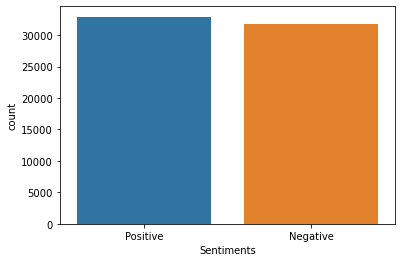

In [148]:
import seaborn as sns

sns.countplot(x='Sentiments', data=All_data)

# Preprocessing

In [142]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [143]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [149]:
X = []
sentences = list(All_data['Reviews'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [150]:
x[10]

tensor(-0.2910)

### Spliting the dat into train, validation and test set

In [118]:
train, val, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [119]:
train['Reviews']
all_strings = list(map(str.strip,train['Reviews']))

In [120]:
# for words in glove:
#     for word in reviews_tokenized[10]:
#          if word not in glove:
#             print (word)

https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/

In [127]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [128]:
df.isnull().values.any()

False

In [129]:
df.shape

(64720, 3)